# To do the following exercises you need to know how to use:
* pandas dataframes
* dictionaries
* plotting array of images
* convert data to .to_numpy()
* assign inputs (features) to **X_data**
* assign outputs (labels/targets) to **y_data**
* understand the output of attribute .shape (dimensions of the data)
* generate random integers np.random.randint()
* convert color image to grayscale

## Solved by John Alexander Osorio Henao - 1035435726

# Exercise 1
* the file 'mnist_test.csv' contains 10000 images of digits in grayscale saved as a rows in the csv file
* first column contains value of the digits then 784 columns correspond to pixels
* make an array of plots of 25 randomly chosen images (5x5) 
* each plot has to have a title corresponding to a digit 

In [1]:
!ls

mnist_test.csv	name_homework_1.ipynb


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#loading to pandas DF

images_df = pd.read_csv("https://raw.githubusercontent.com/jaosorioh/NeuralNetworkRSouzaCourse/master/Notebooks/extras/Homeworks/Homework_2/mnist_test.csv", sep=",")
images_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#converting to numpy arra
images_np = images_df.to_numpy()
#selecting the columns

num_samples = images_df.shape[0]
rand_idx = np.random.randint(0, num_samples,25)


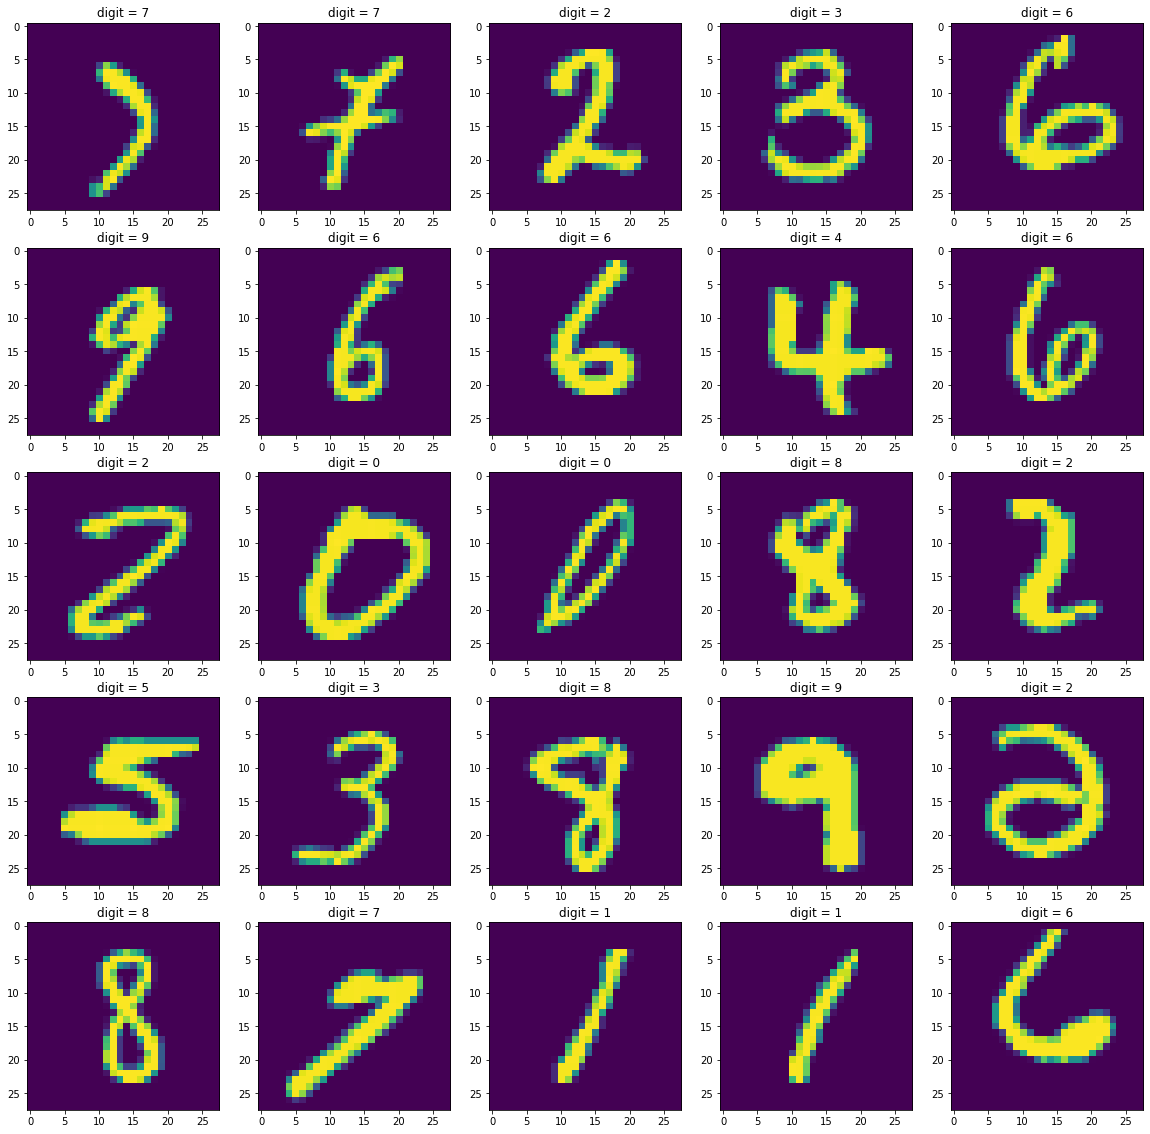

In [32]:
#plotting images
images_np_filter = images_np[rand_idx]
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i in range(25):
    #calc the row and column in the subplot
    digit = images_np_filter[i][0]
    row = int(i / 5)
    col = i - row*5
    #reshape the information of pixels into a 28x28 matriz
    image = images_np_filter[i][1:].reshape(28, 28)
    ax[row, col].set_title("digit = %d"%digit)
    ax[row, col].imshow(image,aspect='auto')
    

# Exercise 2

* Sklearn digits dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) contains 1797 images of digits in grayscale 
* download the dataset (command is below) and:
* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title corresponding to a digit 

In [33]:
from sklearn import datasets
digits = datasets.load_digits() # digits is a dictionary
print(digits['data'].shape, digits['target'].shape)

(1797, 64) (1797,)


In [34]:
#extracting arrays
images_np_2 = digits['data']
digits_labels = digits['target']

#selecting the columns
num_samples = images_np_2.shape[0]
rand_idx_2 = np.random.randint(0, num_samples, 25)
images_np_2_filter = images_np_2[rand_idx_2]
digits_labels_filter = digits_labels[rand_idx_2]

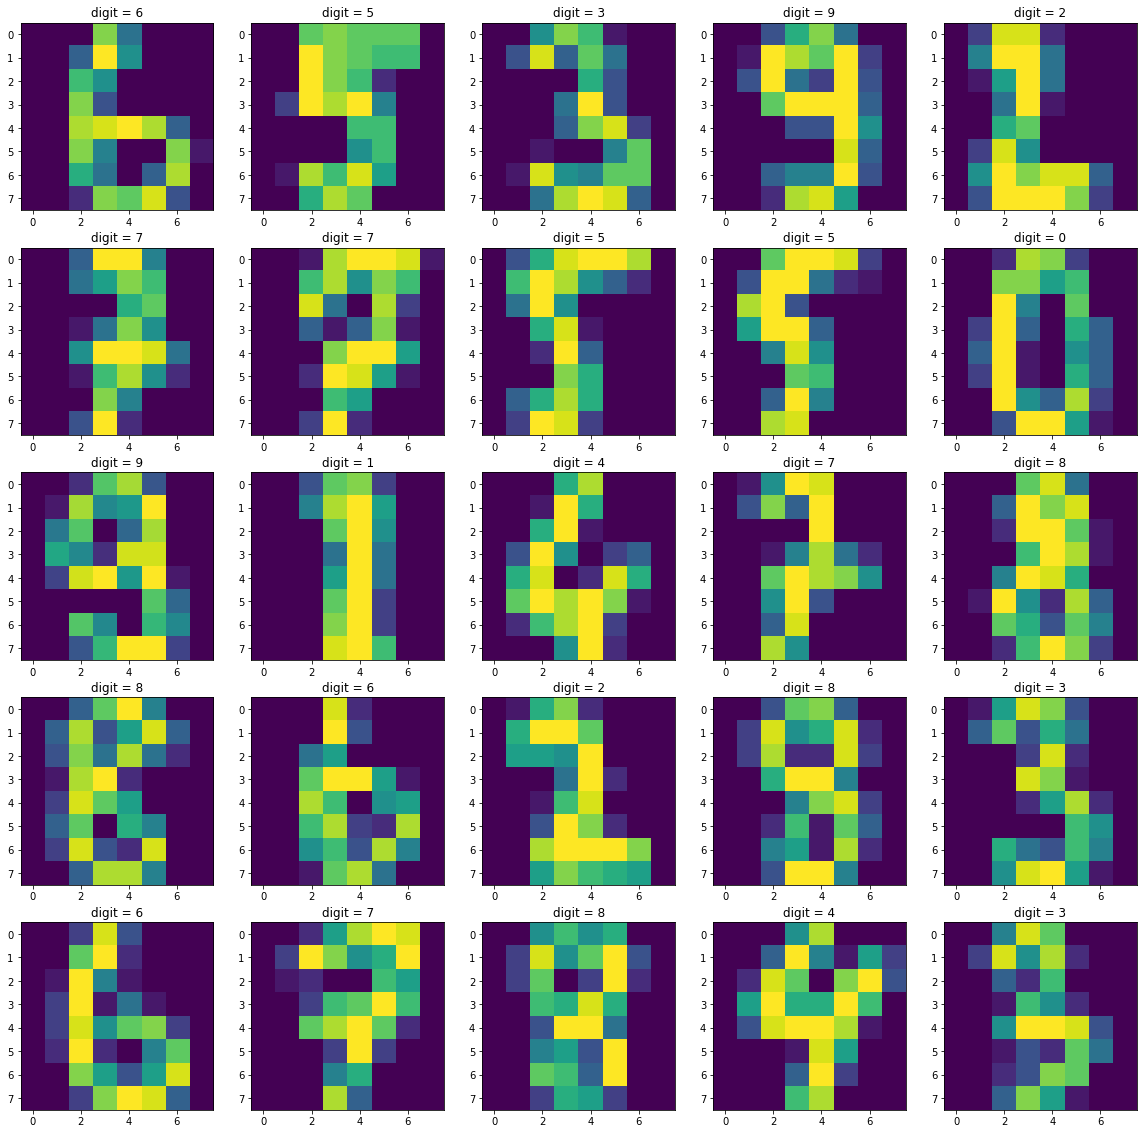

In [35]:
#plotting images
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i in range(25):
    #calc the row and column in the subplot
    digit = digits_labels_filter[i]
    row = int(i / 5)
    col = i - row*5
    #reshape the information of pixels into a 8x8 matriz
    image = images_np_2_filter[i].reshape(8, 8)
    ax[row, col].set_title("digit = %d"%digit)
    ax[row, col].imshow(image,aspect='auto')
    

# Exercise 3
The CIFAR-10 dataset consists of, in total, 60000 **color** (three channels) images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download. 

http://www.cs.toronto.edu/~kriz/cifar.html

* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title with a corresponding label



* convert the color images to grayscale by averaging one of the dimensions and again display the images


* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title with a corresponding label

In [3]:
import tensorflow as tf
(X_data, y_data), (_, _) = tf.keras.datasets.cifar10.load_data()
#I found this here https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
labels = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

170500096/170498071 [==============================] - 53s 0us/step


In [36]:
print(X_data.shape, y_data.shape)

(50000, 32, 32, 3) (50000, 1)


In [37]:
#selecting random images
num_samples = X_data.shape[0]
rand_idx_3 = np.random.randint(0, num_samples, 25)
X_data_filter = X_data[rand_idx_3]
y_data_filter = y_data[rand_idx_3]

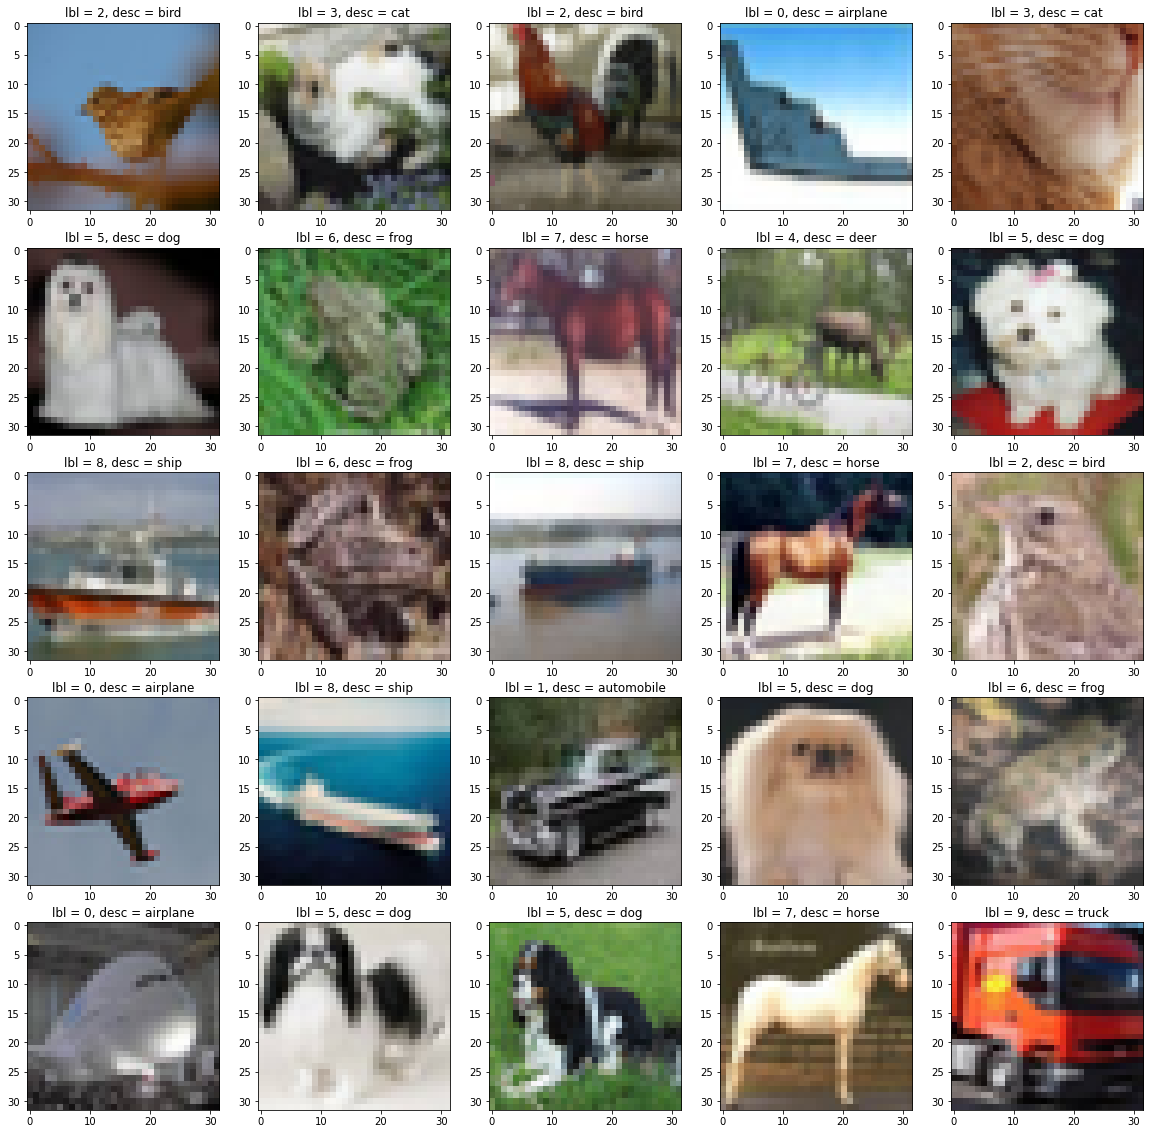

In [38]:
#plotting images
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i in range(25):
    #calc the row and column in the subplot
    label_desc = labels[y_data_filter[i][0]]
    row = int(i / 5)
    col = i - row*5
    image = X_data_filter[i]
    ax[row, col].set_title("lbl = %d, desc = %s"%(y_data_filter[i][0], label_desc))
    ax[row, col].imshow(image,aspect='auto')
    

In [39]:
#converting to grayscale
X_data_avg = np.average(X_data,-1)
num_samples = X_data_avg.shape[0]
rand_idx_4 = np.random.randint(0, num_samples, 25)
X_data_avg_filter = X_data_avg[rand_idx_4]
y_data_avg_filter = y_data[rand_idx_4]

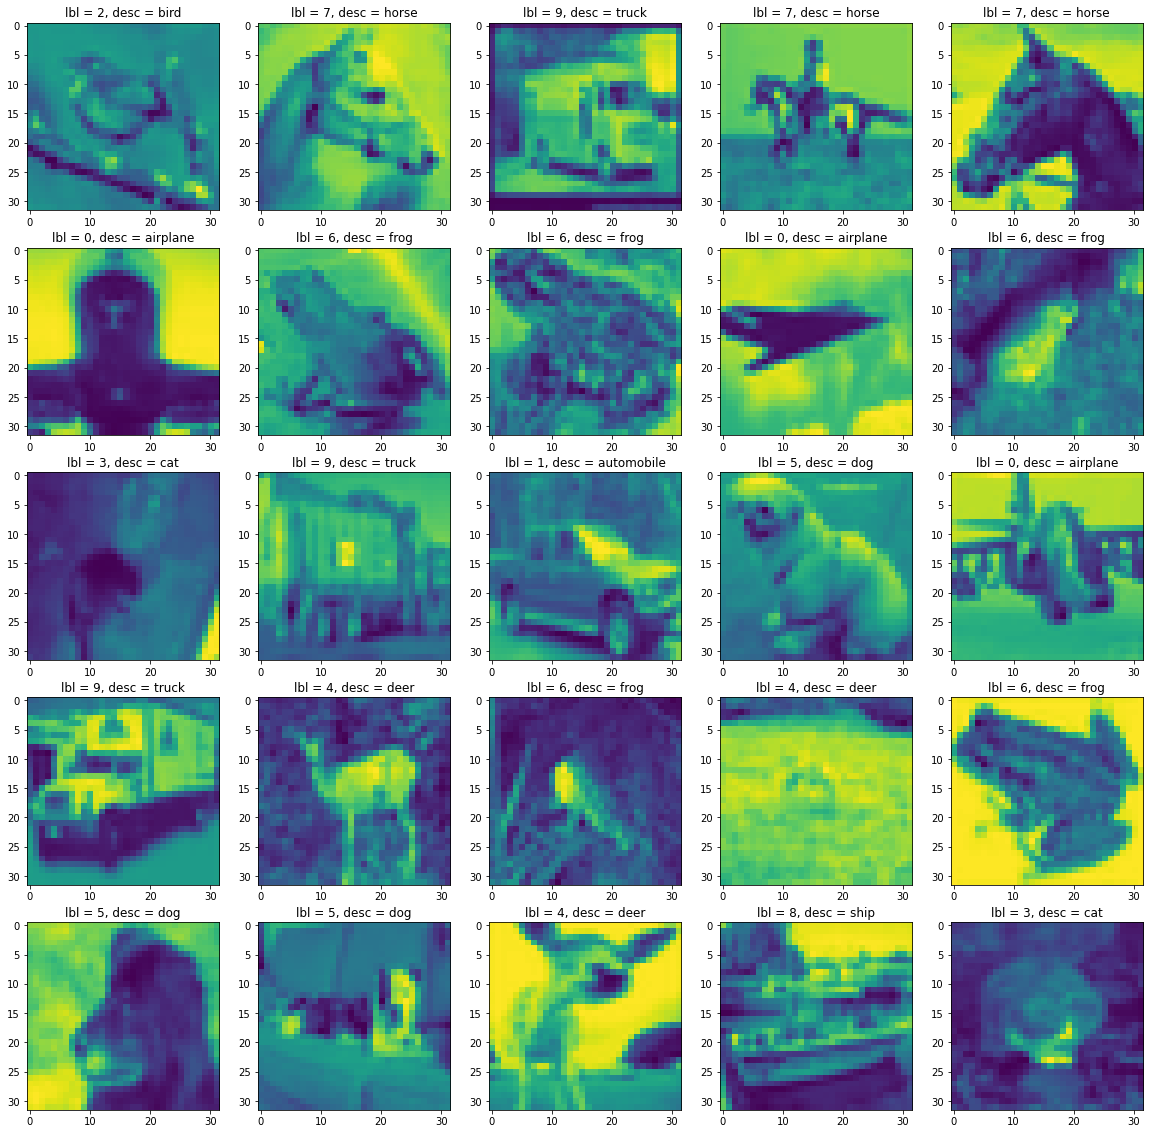

In [40]:
#plotting images
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i in range(25):
    #calc the row and column in the subplot
    label_desc = labels[y_data_avg_filter[i][0]]
    row = int(i / 5)
    col = i - row*5
    image = X_data_avg_filter[i]
    ax[row, col].set_title("lbl = %d, desc = %s"%(y_data_avg_filter[i][0], label_desc))
    ax[row, col].imshow(image,aspect='auto')
    